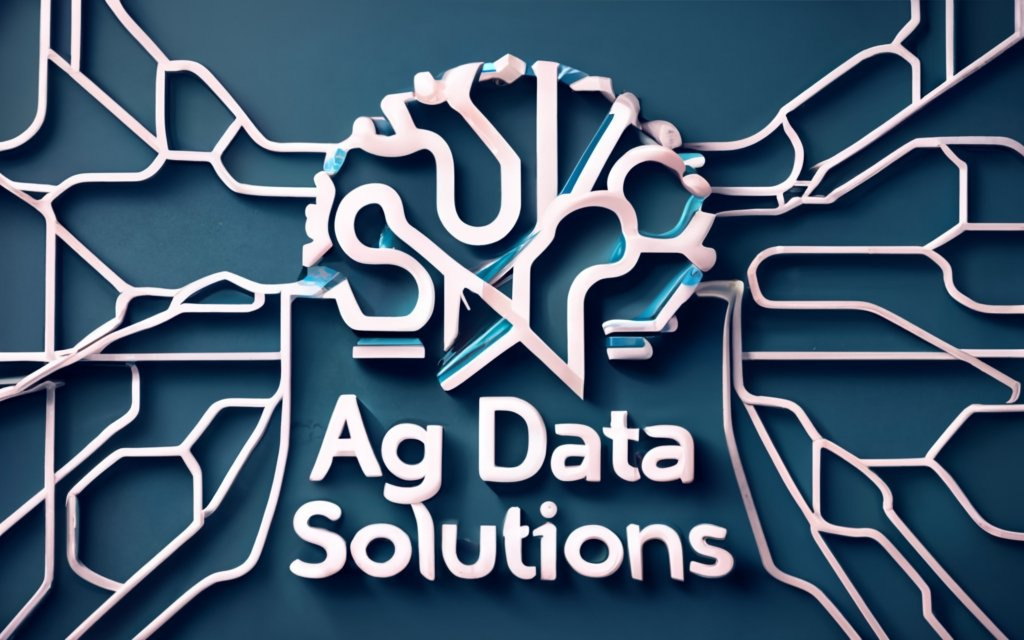

# Do Dado à Decisão: Como Ciência de Dados Ilumina o Caminho na Avaliação de Pagadores


Em um cenário empresarial cada vez mais dinâmico, a capacidade de antecipar o comportamento financeiro dos clientes tornou-se crucial para a sustentabilidade e o crescimento das empresas. Uma problemática recorrente que desafia organizações de todos os setores é a previsão se um cliente será um bom ou mau pagador.

Imagine um dataset rico em informações sobre clientes, abrangendo desde históricos de transações até características pessoais. No entanto, a incerteza paira sobre a capacidade desses clientes de cumprir com suas obrigações financeiras. Nesse contexto, emerge a necessidade premente de desenvolver estratégias eficazes para identificar padrões que possam antecipar comportamentos de pagamento.

A previsão de mau pagamento não apenas minimiza riscos financeiros, mas também possibilita a criação de estratégias personalizadas para cada perfil de cliente. Isso não apenas protege os interesses da empresa, mas também aprimora a experiência do cliente, estabelecendo relações mais sólidas e duradouras.

Neste contexto, a Ciência de Dados emerge como uma ferramenta estratégica, capacitando as empresas a agir proativamente diante da incerteza financeira. A análise preditiva não apenas otimiza processos de tomada de decisão, mas também contribui para a construção de um ecossistema financeiro mais estável e confiável.

A seguir, você encontrará exatamente esse cenário no qual dados de clientes considerados mau pagadores foram disponibilizados. O objetivo deste projeto é desenvolver um modelo que, no mínimo, alcance uma taxa superior à decisão aleatória de 50%.

# índice

- [Importação das Bibliotecas](#0)
- [Função de exploração dos dados](#1)
- [Análise inicial dos dados](#2)
- [Conclusão da análise inicial dos dados](#3)
- [Tratamento dos dados](#4)
- [modelagem machine learning](#5)
- [Avaliando Técnicas de Balanceamento](#m1)
- [Conclusão](#m2)

<a id="0"></a>
## Importação das bibliotecas

In [1]:
# Padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from xgboost import XGBClassifier


# outros
import warnings
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport
%matplotlib inline

<a id="1"></a>
## Função de exploração dos dados

In [2]:
class Inicio:
    def __init__(self):
        self.data = self.importar()
        
    def importar(self):
        return pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\demo01.csv")
    
    def exploration(self):
        dt = self.data.copy()
        print(f"Número de linhas: {dt.shape[0]}\nNúmero de colunas: {dt.shape[1]}")
        print(f"Dados Vazios: {dt.isnull().sum().sum()}")
        print(f"Dados duplicados: {dt.duplicated().sum()}")
        
        num = dt.select_dtypes(include=np.number).describe().T
        num['unidades'] = dt.select_dtypes(include=np.number).nunique()
        print(f"\n\n{' '*40}Dados Numéricos\n\n")
        display(num)
        
        cat = dt.select_dtypes(exclude=np.number).describe().T
        print(f"\n\n{' '*20}Dados Categóricos\n\n")
        display(cat)
        print(f"\n\n{' '*70}Dados\n\n")
        display(dt.head())
        
    def stat_exploration(self):
        return ProfileReport(self.data)

<a id="2"></a>
## Análise inicial dos dados

In [3]:
Inicio().exploration()

Número de linhas: 16650
Número de colunas: 16
Dados Vazios: 0
Dados duplicados: 9880


                                        Dados Numéricos




count        mean         std          min  \
qtd_filhos             16650.0    0.433153    0.739395     0.000000   
idade                  16650.0   44.319513   11.228837    22.030137   
tempo_emprego          16650.0 -161.416446  376.843912 -1000.665753   
possui_celular         16650.0    1.000000    0.000000     1.000000   
possui_fone_comercial  16650.0    0.225225    0.417743     0.000000   
possui_fone            16650.0    0.295676    0.456360     0.000000   
possui_email           16650.0    0.088889    0.284592     0.000000   
qt_pessoas_residencia  16650.0    2.211892    0.903755     1.000000   

                             25%        50%        75%        max  unidades  
qtd_filhos              0.000000   0.000000   1.000000  14.000000         8  
idade                  34.873973  43.493151  53.410959  68.909589      5298  
tempo_emprego           1.183562   4.691781   9.088356  42.906849      3005  
possui_celular          1.000000   1.000000   1.000000   1.000000         1  
possui_fone_comercial   0.000000   0.000000   0.000000   1.000000         2  
possui_fone             0.000000   0.000000   1.000000   1.000000         2  
possui_email            0.000000   0.000000   0.000000   1.000000         2  
qt_pessoas_residencia   2.000000   2.000000   3.000000  15.000000         9



                    Dados Categóricos




count unique                            top   freq
sexo              16650      2                              F  11201
posse_de_veiculo  16650      2                              N  10178
posse_de_imovel   16650      2                              Y  11176
tipo_renda        16650      5                        Working   8565
educacao          16650      5  Secondary / secondary special  11245
estado_civil      16650      5                        Married  11680
tipo_residencia   16650      6              House / apartment  14974
mau               16650      2                          False  16260



                                                                      Dados




sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  58.832877       3.106849               1                      0   
1  52.356164       8.358904               1                      0   
2  52.356164       8.358904               1                      0   
3  46.224658       2.106849               1                      1   
4  29.230137       3.021918               1                      0   

   possui_fone  possui_email  qt_pessoas_residencia    mau  
0            0             0                    2.0  False  
1            1             1                    1.0  False  
2            1             1                    1.0  False  
3            1             1                    2.0  False  
4            0             0                    2.0  False

In [4]:
Inicio().stat_exploration()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="3"></a>
## Conclusão da análise inicial dos dados

- As duas funções geradas acima nos retornaram informações bem interessantes, tanto do comportamento dos dados como os tratamentos necessários para poder seguir utilizando de forma correta. Abaixo segue os tratamentos necessários

#### **Tratamentos**
- Dados duplicados: Há presença de uma parcela significante de dados iguais, tendo como uma boa prática a remoção desses daods para estudo e machine learning.
- Coluna com somente uma classe, que acaba somente ocupando mais espaço e não acrescentando em nada, então será feita a remoção do atributo "possui_celular"
- Algumas classes apresentaram uma alta correlação, essa lineariedade entre as variáveis pode gerar problemas mais à frente, porém não é necessário eliminar essa correlações, com base na análise estatística será feito a consideração adequadra de cada variável.
- A variável "tempo_emprego" apresenta dados negativos, que deve ser averiguado e corrigido.
- A variável alvo (mau) é altamente desbalanceada, então diferentes formas de tratamento podem ser aplicadas para corrigir isso no treinamento dos dados e retornar com bons resultados.

<a id="4"></a>
## Tratamento dos dados

In [5]:
class TratandoDados:
    
    def __init__(self):
        self.data = Inicio().importar()
        self.dt = self.tratamento()
    def tratamento(self):  
        dt = self.data.copy()
        
        # Removendo dados duplicados
        dt = dt.drop_duplicates()
        
        # Removendo variável possui_celular
        dt = dt.drop('possui_celular', axis=1)
        
        # Como o tempo de emprego parece ser um valor fora do normal, visto que o valor máximo foi próximo de 43.
        #Deve-se elimina-lo
        dt = dt.loc[dt['tempo_emprego'] > 0]
        
        # Transformando booleano em numérico
        dt['mau'] = LabelEncoder().fit_transform(dt['mau'])
        
        # Reset do indice para ajustar depois de remover alguns dados
        dt = dt.reset_index(drop=True)
        
        return dt
    
    def exploration(self):
        return ProfileReport(self.dt)

In [6]:
df = TratandoDados().dt
df.head()

sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    M                Y               Y           0               Working   
3    F                Y               N           0               Working   
4    F                N               Y           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2               Higher education               Married  House / apartment   
3              Incomplete higher               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

       idade  tempo_emprego  possui_fone_comercial  possui_fone  possui_email  \
0  58.832877       3.106849                      0            0             0   
1  52.356164       8.358904                      0            1             1   
2  46.224658       2.106849                      1            1             1   
3  29.230137       3.021918                      0            0             0   
4  27.482192       4.024658                      0            1             0   

   qt_pessoas_residencia  mau  
0                    2.0    0  
1                    1.0    0  
2                    2.0    0  
3                    2.0    0  
4                    2.0    0

#### Visualizando as alterações feitas nos dados

In [7]:
TratandoDados().exploration()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="5"></a>
## Modelagem Machine Learning
#### Dados desbalanceados
- Nessa etapa será criado um modelo de regressão logística para previsão de clientes que não irão pagar o empréstimo, o modelo apresenta certas dificuldades como a redução significativa da quantidade de dados, tanto por conter valores duplicados como errônios, além de uma pequena margem, menor que 5% de maus pagadores. Será então o objetivo criar o melhor modelo possível com o que foi disponibilizado.

#### Metricas
- Será utilizado 4 parâmetros como métrica de avaliação dos resultados do modelo gerado, sendo-os ROC, GINI e Recall. Abaixo está uma pequena explicação de cada um e como analisar cada resultado. 
- A **curva ROC (Receiver Operating Characteristic)** é uma representação gráfica que destaca a habilidade do modelo de distinguir entre as classes positiva e negativa, variando o ponto de corte para as probabilidades preditas. Quanto mais a curva se afasta da linha diagonal, melhor o desempenho, e a área sob a curva (ROC AUC) resume essa performance.
- O **índice Gini** mede a desigualdade nas probabilidades preditas entre as classes. Ao calcular a diferença acumulada entre as frequências de verdadeiros positivos e falsos positivos, normalizada pelo número total de exemplos, o Gini fornece uma métrica que indica quão bem o modelo discrimina entre as classes. Valores mais altos sugerem uma melhor capacidade de distinção.
- Por fim, o **Recall**, também conhecido como Sensibilidade, mede a habilidade do modelo de identificar corretamente todos os exemplos da classe positiva. Calculando a proporção de verdadeiros positivos em relação ao total de exemplos da classe positiva, o Recall fornece uma métrica importante para avaliar quão bem o modelo captura os casos positivos. Quanto mais próximo de 1, melhor o modelo é nessa captura.

#### Balanceamento do alvo
- Como demonstrado na análise acima, os dados apresentam um desbalanço de mais de 95% e isso é muito prejudicial para um modelo de treinamento e até a análise estatística que pode ser feita.
- A formula de solucionar isso é aplicando técnicas de transformação, sendo Undersampling, Oversampling ou os dois, que basicamente vai ou pegar a classe de maior representação e diminuí-la, ou pegar a menor classe e criar variáveis próximas a ela para aumentar a quantidade de elementos.


<a id='m0'></a>
### Regressão Logística

In [8]:
class ModelsML:
    
    def __init__(self, bl = None):
        self.data = TratandoDados().dt
        if (bl is not None):
            self.data = self.balance(bl)
        
            
    def balance(self, bl):
        
        X = self.data.copy()
        y = X.pop('mau')
        for i in X.select_dtypes(exclude=np.number):
            X[i] = LabelEncoder().fit_transform(X[i])
            
        if bl == 0:
            smt = TomekLinks(sampling_strategy='auto')
            X_b, y_b = smt.fit_resample(X, y)
            X_b['mau'] = y_b
            self.data = X_b
            return self.data
    
    def pca_(self, variaveis):
        df_ = self.data.copy()
        y = df_.pop('mau')
        # transformar = list(set(self.data.columns) - set(variaveis))
        for i in df_:
            df_[i] = LabelEncoder().fit_transform(df_[i])
        pca = PCA(n_components=1).fit(df_)
        pca_ = pca.transform(df_)
        df_ = self.data.copy()
        df_ = df_[variaveis]
        df_['pca'] = pca_
        self.data = df_
        variaveis = "mau ~ tempo_emprego + C(posse_de_imovel) + pca"
        return self.logistica(variaveis)
    
    def logistica(self, variaveis):
        
        reglog = smf.logit(variaveis, data=self.data).fit()
        return reglog.summary().tables[1]
        
    

In [9]:
num = " + idade + tempo_emprego"
cat = "C(sexo)+ C(posse_de_veiculo) + C(posse_de_imovel) + C(qtd_filhos) + C(tipo_renda) + C(educacao) + C(estado_civil) + "
cat += "C(tipo_residencia) + C(possui_fone_comercial) + C(possui_fone) + C(possui_email) + C(qt_pessoas_residencia)"
variavel = cat + num
variavel = f"mau ~ {variavel}"

In [10]:
ModelsML().logistica(variavel)

         Current function value: 0.171398
         Iterations: 35


<class 'statsmodels.iolib.table.SimpleTable'>

- Analisando o resultado acima usando como base os valores de  P>|Z|, as variáveis que se destacam são: Tempo_emprego e posse_de_imovel
- Passando esses parâmetros agora, vemos a seguinte situação


In [11]:
variavel = "mau ~ tempo_emprego + C(posse_de_imovel)"
ModelsML().logistica(variavel)

Optimization terminated successfully.
         Current function value: 0.177488
         Iterations 7


<class 'statsmodels.iolib.table.SimpleTable'>

#### Afim de não perder informação, pode-se utilizar um PCA nos dados rejeitados

In [12]:
ModelsML().pca_(['tempo_emprego','posse_de_imovel','mau'])

Optimization terminated successfully.
         Current function value: 0.177486
         Iterations 7


<class 'statsmodels.iolib.table.SimpleTable'>

#### PCA não conseguiu captar informações relevantes para o modelo, sendo assim, somente as duas variáveis serão utilizadas

<a id='m1'></a>

## Avaliando Técnicas de Balanceamento

- A classe ModelosML em Python é projetada para facilitar a criação, treinamento e avaliação de modelos de regressão logística. Ao ser inicializada, ela carrega os dados e permite especificar o tipo de balanceamento a ser aplicado durante o treinamento. O método reg_log treina um modelo de regressão logística, aplicando balanceamento se necessário, e avalia seu desempenho usando métricas como acurácia, área sob a curva (AUC), índice de Gini, recall, curva ROC e matriz de confusão. A classe é útil para análise de dados, proporcionando uma maneira fácil de treinar e avaliar modelos de regressão logística, com ênfase na interpretação visual das métricas.


#### Funções

In [13]:
class ModelosML:
    
    def __init__(self, bl = None):
        self.data = TratandoDados().dt
        if (bl is not None):
            self.bl = bl
        
    def balance(self, X, y):
        bl = self.bl
        if bl == 0:
            print(f"{' '*20}Random Under Sampler")
            smt = RandomUnderSampler(sampling_strategy='auto',random_state=42)
            X_b, y_b = smt.fit_resample(X, y)
            return  X_b, y_b
        elif bl == 1:
            print(f"{' '*20}SMOTE")
            smt = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
            X_b, y_b = smt.fit_resample(X, y)
            return  X_b, y_b
        elif bl == 2:
            print(f"{' '*20}SMOTETomek")
            smt = SMOTETomek(sampling_strategy='auto',random_state=42)
            X_b, y_b = smt.fit_resample(X, y)
            return  X_b, y_b
        elif bl == 3:
            print(f"{' '*20}SMOTEENN")
            smt = SMOTEENN(sampling_strategy='auto',random_state=42)
            X_b, y_b = smt.fit_resample(X, y)
            return  X_b, y_b
        elif bl == "normal":
            print(f"{' '*20}Sem Balanceamento")
            return X,y
        
    def metricas(self, real, prev):
    
        acc = accuracy_score(real, prev)
        fpr, tpr, threshold = roc_curve(real, prev)
        roc_auc = auc(fpr, tpr)
        gini = 2*roc_auc - 1
        recall = recall_score(real, prev)
        print(f"Recall: {recall*100:.2f} %\nAcurácia: {acc*100:.2f} %\nGini: {gini*100:.2f} %")
        self.real = real
        self.prev = prev
        self.graf(fpr, tpr)
        
    def graf(self, fpr, tpr):
        
        figura = plt.figure(figsize=(10,5))
        ax = plt.subplot2grid((1,2),(0,0))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Área sob a curva (AUC) = {auc(fpr, tpr):.2f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taxa de Falso Positivo (FPR)')
        plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
        plt.title('Curva ROC')
        plt.legend(loc='lower right')
        
        
        conf_matrix = confusion_matrix(self.real, self.prev)
        # Matriz de Confusão
        sns.set(font_scale=1.2)
        
        ax = plt.subplot2grid((1,2),(0,1))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                    annot_kws={"size": 16}, linewidths=0.5, square=True,
                    xticklabels=["Classe Bom", "Classe Mau"],
                    yticklabels=["Classe Bom", "Classe Mau"])
        plt.xlabel('Previsto')
        plt.ylabel('Verdadeiro')
        plt.title('Matriz de Confusão')
        
        return plt.show()
    
    def reg_log(self, variavel):
        y, X = patsy.dmatrices(variavel, self.data)
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
        X_tr, y_tr = self.balance(X_tr, y_tr)
        
        modelo = sm.OLS(y_tr, X_tr).fit()
        y_pred = modelo.predict(X_te)
        y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
        self.metricas(y_te, y_pred)
    
    
        
        

## Analisando os Diferentes Resultados da Regressão Logística com Diferentes Métodos de Balanceamento dos Dados

                    Sem Balanceamento
Recall: 0.00 %
Acurácia: 96.15 %
Gini: 0.00 %


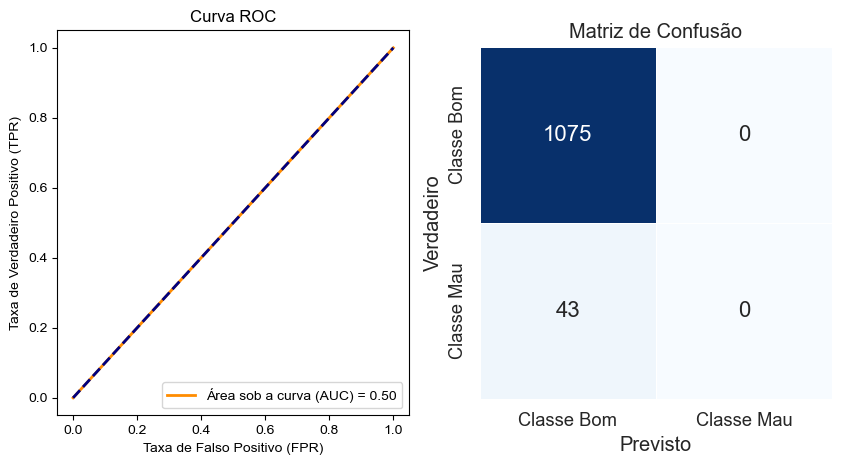

In [14]:
ModelosML('normal').reg_log('mau ~ np.log(tempo_emprego) + posse_de_imovel')

                    Random Under Sampler
Recall: 53.49 %
Acurácia: 61.36 %
Gini: 15.16 %


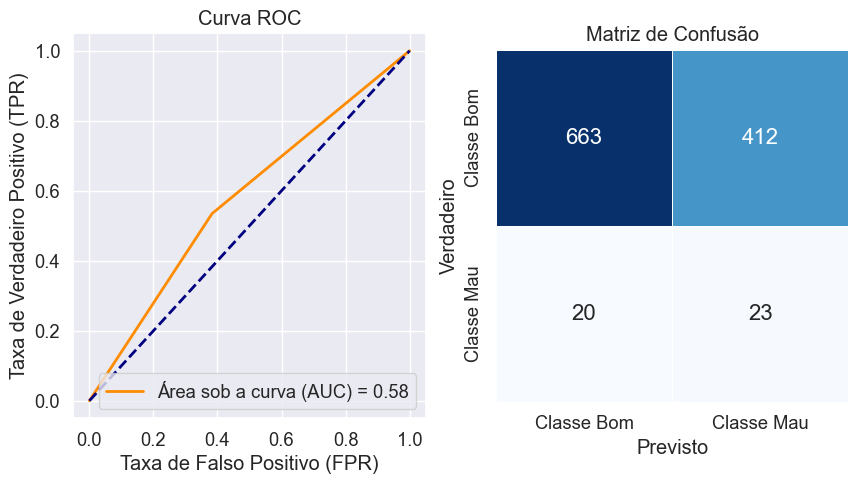

In [15]:
ModelosML(0).reg_log('mau ~ np.log(tempo_emprego) + posse_de_imovel ')

                    SMOTE
Recall: 53.49 %
Acurácia: 61.72 %
Gini: 15.53 %


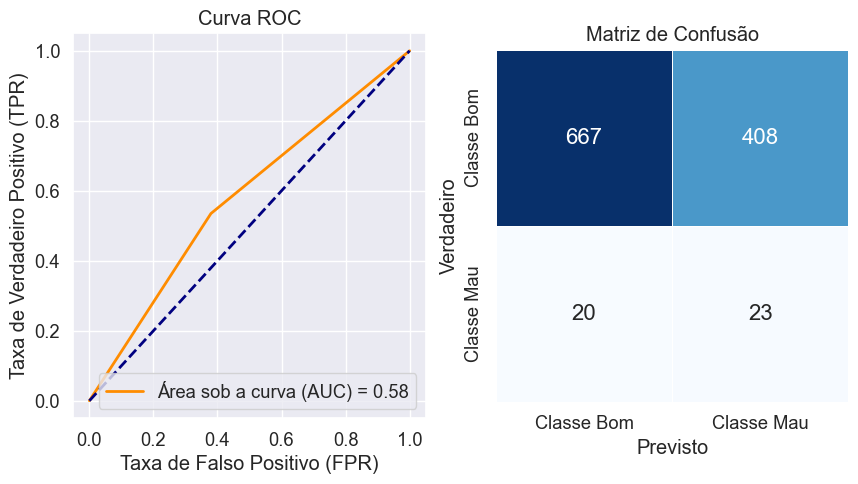

In [16]:
ModelosML(1).reg_log('mau ~ posse_de_imovel + np.log(tempo_emprego)  ')

                    SMOTETomek
Recall: 51.16 %
Acurácia: 61.90 %
Gini: 13.49 %


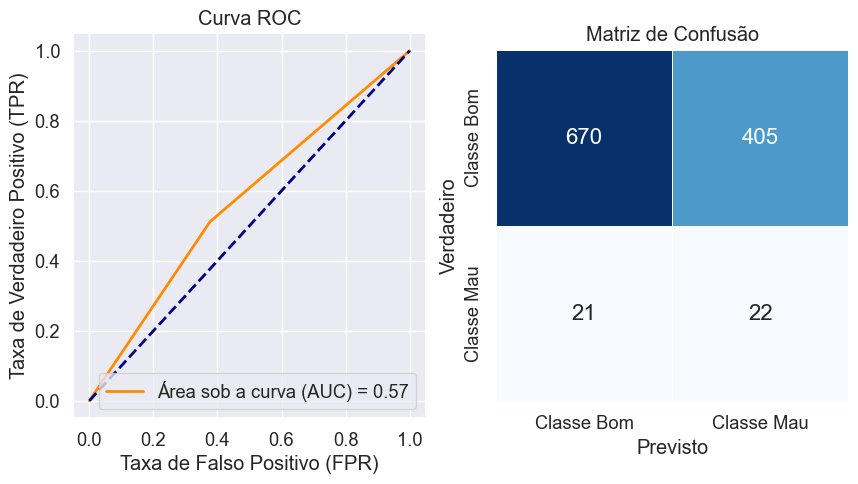

In [17]:
ModelosML(2).reg_log('mau ~  posse_de_imovel + np.log(tempo_emprego) ')

                    SMOTEENN
Recall: 46.51 %
Acurácia: 70.13 %
Gini: 17.58 %


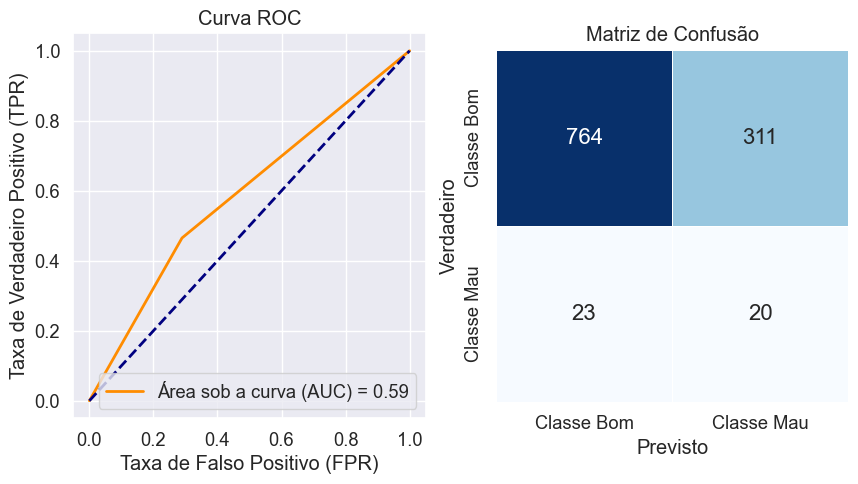

In [18]:
ModelosML(3).reg_log('mau ~ tempo_emprego + posse_de_imovel + np.log(tempo_emprego) ')

### Com o intuito de demonstrar a importância de todo o tratamento feito anteriormente, abaixo irei passar na função todas as variáveis.

In [19]:
num = " + idade + tempo_emprego"
cat = "sexo+ posse_de_veiculo + posse_de_imovel +qtd_filhos+ tipo_renda + educacao + estado_civil + "
cat += "tipo_residencia + possui_fone_comercial + possui_fone + possui_email + qt_pessoas_residencia"
variavel = cat + num
variavel = f"mau ~ {variavel}"

                    SMOTEENN
Recall: 58.14 %
Acurácia: 36.40 %
Gini: -6.33 %


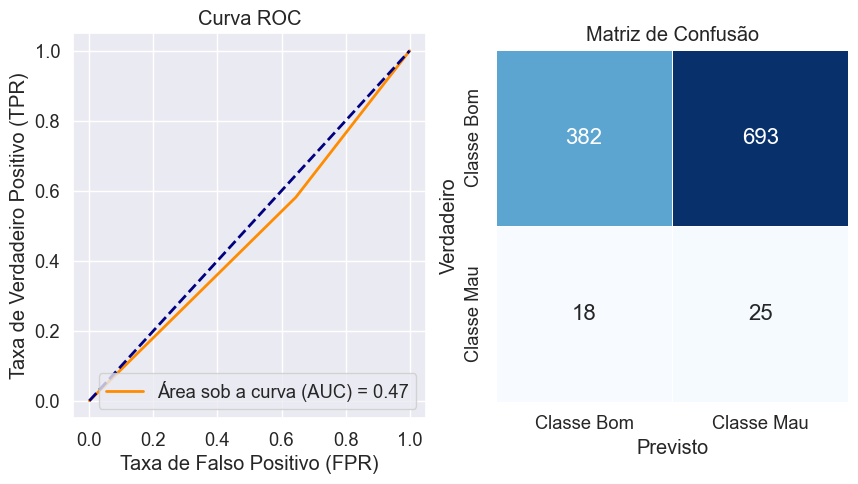

In [20]:
ModelosML(3).reg_log(variavel)

<a id='m2'></a>
# Conclusão 

#### Análisando Regressão Logística com Todas as Variáveis
- Fica claro que as análises estatísticas anteriores nos retornaram um resultado mais acima, tal qual uma decisão aleatória se alguém era ou não um mau pagador seria melhor que a decisão de um modelo de machine learning. 

#### Análisando Técnicas de Balanceamento
- Ao meu ver, a técnica que apresentou o melhor resultado foi a SMOTEENN, pois se manteve na média de classificação, como os outros modelos e sua classificação errada de mau pagador foi menor que os outros modelos de balanceamento dos dados. 

#### Valeu ou não a pena o uso do Balanceamento?
- Como demosntrado na primeira função, observa-se que somente a seleção de atributos igualaria com uma tomada de decisão se é ou não um mal pagador. Outras técnicas de Feature Generation, como também de machine learning poderiam ser implementadas para buscar um resultado melhor, mas ao que foi proposto inicialmente o algoritmo chegou a resultados satisfatórios.